Epoch 1/10
938/938 [==============================] - 17s 16ms/step - loss: 0.4597 - accuracy: 0.8554 - val_loss: 0.0935 - val_accuracy: 0.9710
Epoch 2/10
938/938 [==============================] - 14s 15ms/step - loss: 0.1605 - accuracy: 0.9545 - val_loss: 0.0601 - val_accuracy: 0.9814
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1173 - accuracy: 0.9661 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 4/10
938/938 [==============================] - 14s 14ms/step - loss: 0.1020 - accuracy: 0.9706 - val_loss: 0.0485 - val_accuracy: 0.9852
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0918 - accuracy: 0.9741 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 6/10
938/938 [==============================] - 14s 15ms/step - loss: 0.0823 - accuracy: 0.9769 - val_loss: 0.0467 - val_accuracy: 0.9879
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0758 - accuracy: 0.9788 - val_loss: 0.0396 - val_accuracy:

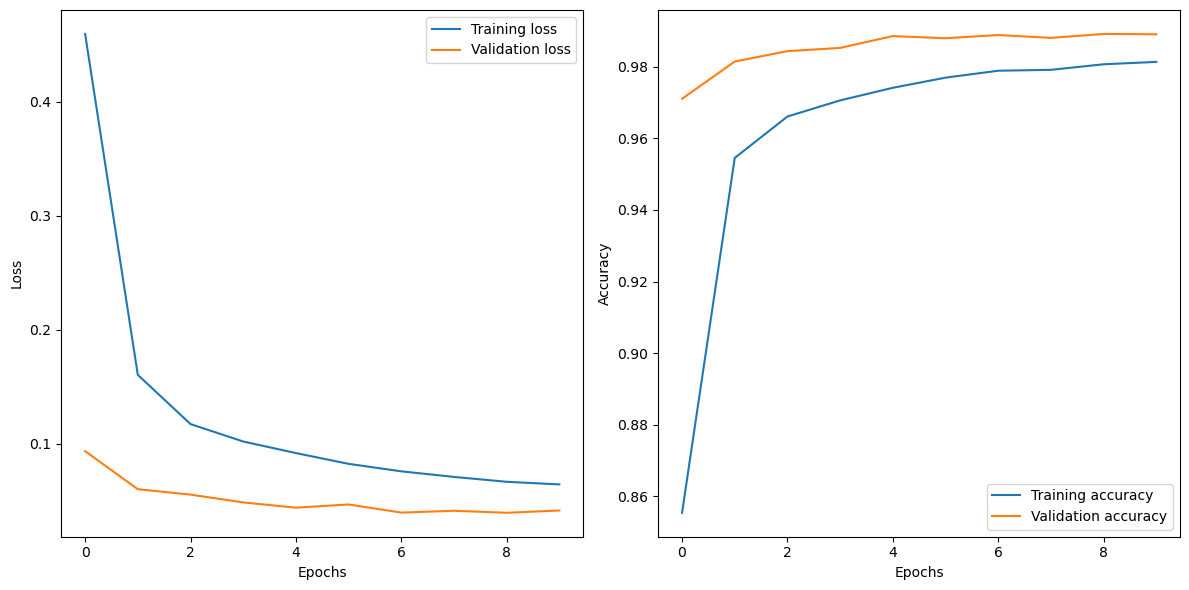

313/313 [==============================] - 1s 2ms/step


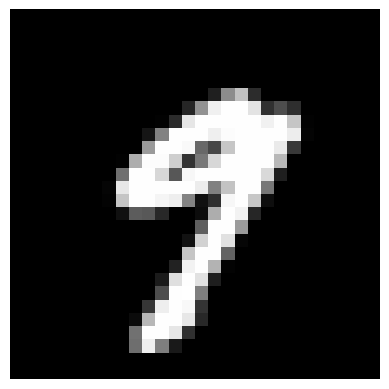

Predicted label: 9
Actual label: 9


In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load training and test data from CSV files
train_df = pd.read_csv('mnist_train.csv')  # Replace with actual path
test_df = pd.read_csv('mnist_test.csv')    # Replace with actual path

# Separate features and labels
x_train = train_df.iloc[:, 1:].values  # Assuming the first column is the label
y_train = train_df.iloc[:, 0].values   # Labels are in the first column

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the images (pixel values 0-255 to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to 28x28x1 (MNIST image format)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make a prediction on a test image
n = 20  # Select an image index for visualization
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[n])
actual_label = np.argmax(y_test[n])

# Display the image and predictions
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')  # Reshape back to 28x28
plt.axis('off')
plt.show()

print("Predicted label:", predicted_label)
print("Actual label:", actual_label)
